In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# BIN
v_grid = [1.06370040e+00, 2.12740080e+00, 4.25480160e+00, 8.50960320e+00,
 1.70192064e+01, 3.40384128e+01, 6.80768256e+01, 1.36153651e+02,
 2.72307302e+02, 5.44614605e+02, 1.08922921e+03, 2.17845842e+03,
 4.35691684e+03, 8.71383368e+03, 1.74276674e+04, 3.48553347e+04,
 6.97106694e+04, 1.39421339e+05, 2.78842678e+05, 5.57685355e+05,
 1.11537071e+06, 2.23074142e+06, 4.46148284e+06, 8.92296569e+06,
 1.78459314e+07, 3.56918627e+07, 7.13837255e+07, 1.42767451e+08,
 2.85534902e+08, 5.71069804e+08, 1.14213961e+09, 2.28427922e+09]

v_grid = np.array(v_grid)
dv = np.diff(v_grid)
dv = np.append(np.array(v_grid[0]), dv)

dlnr = np.log(2)/3 #um

gr0 = [1.54109912e-003, 3.96480818e-002, 1.05540999e+000, 2.51357979e+001,
 4.54609808e+002, 4.67477489e+003, 1.55035279e+004, 5.74215442e+003,
 2.83034396e+003, 1.30446628e+004, 3.51137012e+004, 3.18034420e+004,
 3.26121305e+003, 4.28646494e+000, 9.25655741e-007, 5.39585111e-021,
 2.29187479e-050, 5.16847908e-110, 3.28561387e-230, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000]

gr0 = np.array(gr0)
mbin_0 = gr0*dlnr # um**3 / cm3
vbin_0 = mbin_0
dv_bin = dv

In [3]:
# import cloudy from julia setup
def mom_i(x):
    n0 = 20.0
    k0 = 2.0
    theta0 = 500.0
    n1 = 100.0
    k1 = 4.0
    theta1 = 15.0
    return n0*gamma.pdf(x, k0, scale=theta0) + n1*gamma.pdf(x,k1,scale=theta1)

In [8]:
# import rbf from julia setup
from scipy.stats import norm
from scipy.stats import gamma

def cslogrbf1(x, mean, stddev):
    r = abs((np.log(x)-mean)/stddev)
    cslogr = np.zeros(len(x))
    for (i, ri) in enumerate(r):
        if (ri < 1):
            cslogr[i] = 12/35*(1-ri)**4 * (4+16*ri+12*ri**2+3*ri**3)/x[i]/stddev
    return cslogr

def constant_piecewise(x, mean, sl, sr):
    cp = np.zeros(len(x))
    for (i, xi) in enumerate(x):
        if xi > mean - sl and xi < mean + sr:
            cp[i] = mean
    return cp

def rbf_basis_mass(x, constants, means, stddev):
    N = len(means)
    assert (len(stddev) == N)
    assert (len(constants) == N)
    pdf_result = 0
    
    for i in range(N):
        pdf_result += constants[i]*cslogrbf1(x, means[i], stddev[i])
        
    return pdf_result

def bin_basis(x, constants, means, sls, srs):
    N = len(means)
    assert (len(constants) == N)
    pdf_result = 0

    for i in range(N):
        pdf_result += constants[i]*constant_piecewise(x,means[i],sls[i],srs[i])
    
    return pdf_result

def rbf4_i(x):
    means = [3.912023005428146, 5.141649490132791, 6.371275974837436, 7.600902459542082]
    stddevs = [2.5708247450663957, 5.141649490132791, 2.4592529694092904, 2.459252969409291]
    c_init = [130.50166810653394, 0.000137696790436891, 7.757926136467192, 12.65908919791193]
    return rbf_basis_mass(x, c_init, means, stddevs)

def rbf4_basis(x):
    means = [3.912023005428146, 5.141649490132791, 6.371275974837436, 7.600902459542082]
    stddevs = [2.5708247450663957, 5.141649490132791, 2.4592529694092904, 2.459252969409291]
    c_init = [130.50166810653394, 0.000137696790436891, 7.757926136467192, 12.65908919791193]
    basis = np.zeros((len(x), len(means)))
    cvec = np.zeros(len(means))
    for i in range(len(means)):
        cvec[i] = c_init[i]
        basis[:,i] = rbf_basis_mass(x, cvec, means, stddevs)
        cvec[i] = 0.0
    return basis


def rbf16_i(x):
    means = [3.912023005428146, 4.219034351160685, 4.526045696893225, 4.833057042625764, 5.140068388358304, 5.447079734090844, 5.754091079823382, 6.061102425555922, 6.368113771288462, 6.675125117021001, 6.982136462753541, 7.289147808486081, 7.59615915421862, 7.903170499951159, 8.2101818456837, 8.517193191416238]
    stddevs = [2.1095171755803426, 0.6140226914650788, 0.6140226914650788, 0.6140226914650793, 0.6140226914650793, 0.6140226914650793, 0.6140226914650784, 0.6140226914650784, 0.6140226914650793, 0.6140226914650793, 0.6140226914650793, 0.6140226914650793, 0.6140226914650793, 0.6140226914650784, 0.6140226914650793, 0.6140226914650793]
    c_init = [104.148278855379, 7.2441684135400655, 2.012897312611752, 0.00100953818922085, 0.000783448814851419, 4.7140027071221884e-5, 1.3942076881833483, 1.8336826143299811, 2.5831549484833896, 3.173239128448314, 3.358140064203081, 2.856231091090895, 1.771550004950474, 0.6916130342487169, 0.09061378282794841, 1.2275677954945896e-6]
    return rbf_basis_mass(x, c_init, means, stddevs)

def rbf16_basis(x):
    means = [3.912023005428146, 4.219034351160685, 4.526045696893225, 4.833057042625764, 5.140068388358304, 5.447079734090844, 5.754091079823382, 6.061102425555922, 6.368113771288462, 6.675125117021001, 6.982136462753541, 7.289147808486081, 7.59615915421862, 7.903170499951159, 8.2101818456837, 8.517193191416238]
    stddevs = [2.1095171755803426, 0.6140226914650788, 0.6140226914650788, 0.6140226914650793, 0.6140226914650793, 0.6140226914650793, 0.6140226914650784, 0.6140226914650784, 0.6140226914650793, 0.6140226914650793, 0.6140226914650793, 0.6140226914650793, 0.6140226914650793, 0.6140226914650784, 0.6140226914650793, 0.6140226914650793]
    basis = np.zeros((len(x), len(means)))
    cvec = np.zeros(len(means))
    c_init = [104.148278855379, 7.2441684135400655, 2.012897312611752, 0.00100953818922085, 0.000783448814851419, 4.7140027071221884e-5, 1.3942076881833483, 1.8336826143299811, 2.5831549484833896, 3.173239128448314, 3.358140064203081, 2.856231091090895, 1.771550004950474, 0.6916130342487169, 0.09061378282794841, 1.2275677954945896e-6]
    for i in range(len(means)):
        cvec[i] = c_init[i]
        basis[:,i] = rbf_basis_mass(x, cvec, means, stddevs)
        cvec[i] = 0.0
    return basis

def rbf16_bin(x):
    means = [1.0, 1.8374356705068007, 3.376169843250776, 6.20349489967833, 11.398522810475969, 20.94405240305397, 38.48334897033506, 70.71067811865478, 129.926322260941, 238.73125906001474, 438.65333106187086, 805.9972774797109, 1480.9681479725882, 2721.183701969227, 5000.000000000004]
    sL = [1.0, 0.41871783525340034, 0.7693670863719876, 1.4136625282137771, 2.5975139553988194, 4.7727647962890005, 8.769648283640544, 16.113664574159863, 29.607822071143104, 54.40246839953687, 99.96103600092806, 183.67197320892, 337.48543524643867, 620.1077769983194, 1139.4081490153883]
    sR = [0.41871783525340034, 0.7693670863719876, 1.4136625282137771, 2.5975139553988194, 4.7727647962890005, 8.769648283640544, 16.113664574159863, 29.607822071143104, 54.40246839953687, 99.96103600092806, 183.67197320892, 337.48543524643867, 620.1077769983194, 1139.4081490153883, 1139.4081490153883]
    c_init = [0.0, 0.0014185096389967185, 0.009849443536743118, 0.05192905813674243, 0.22839516634989127, 0.7497127136725134, 1.44474738699441, 1.0482664579811793, 0.13245570407173604, 0.011861655136061737, 0.014060156595345227, 0.012328251363193734, 0.005592719892641379, 0.00040766945022328475, 0.0]
    return bin_basis(x, c_init, means, sL, sR)
    

<ipython-input-15-401a3aca32b4>:61: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


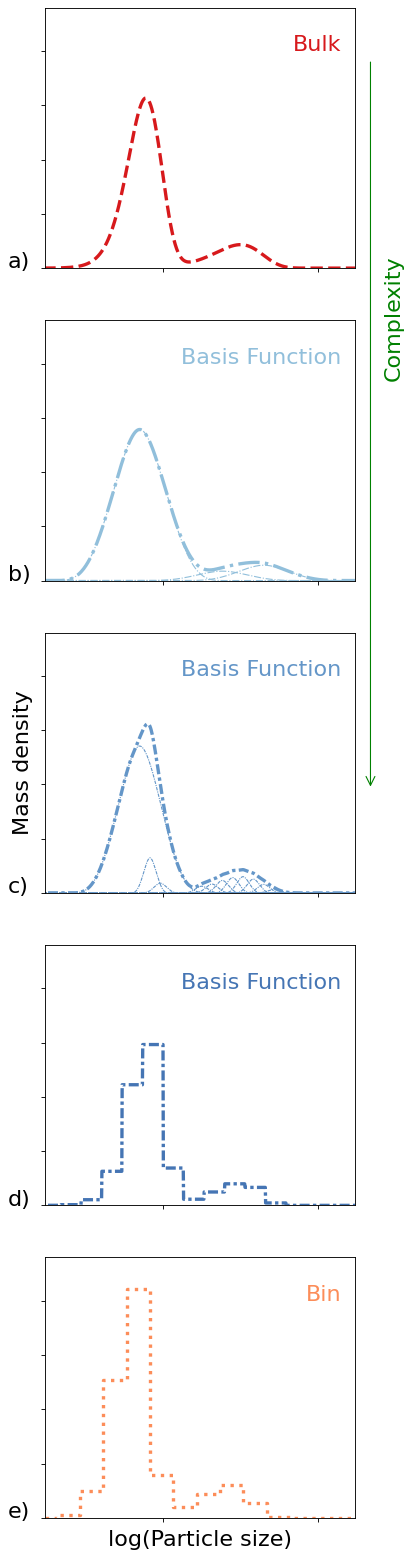

In [15]:
plt.rcParams.update({'font.size':20})
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(5,25), dpi=80, facecolor='w', edgecolor='k', sharex=True)

colors = ['#d7191c','#91bfdb','#6496C8','#4575b4','#fc8d59',]
ls = ['dashed','dashdot',(0, (3, 1, 1, 1)),(0, (3, 1, 1, 1)),'dotted']

x = np.logspace(0.0,4.5,1000)
annotate_xy = (2e4, 100.0)
annotate_abc = (1e-0, 0.0)

# BULK
ymomi = mom_i(x)
ax[0].plot(x, x*ymomi, linestyle=ls[0],color=colors[0],linewidth=3)#, label="MOM (3 moments), init")
ax[0].annotate('Bulk', xy=annotate_xy, color=colors[0], horizontalalignment='right')
ax[0].text(annotate_abc[0], annotate_abc[1], 'a)')

# COLLOCATION
# TODO: rbf4 case, RBF bin case, rbf-underlying, labels, arrow for complexity
yrbf4 = rbf4_i(x)
ax[1].plot(x, x*yrbf4, linestyle=ls[1], color=colors[1],linewidth=3)#, label='Collocation n_bf = 8, init')
rbf4basis = rbf4_basis(x)
for i in range(len(rbf4basis[0,:])):
    ax[1].plot(x, x*rbf4basis[:,i], linestyle=ls[1], color=colors[1],linewidth=1)
ax[1].annotate('Basis Function', xy=annotate_xy, color=colors[1], horizontalalignment='right')
ax[1].text(annotate_abc[0], annotate_abc[1], 'b)')

yrbf16i = rbf16_i(x)
ax[2].plot(x, x*yrbf16i, linestyle=ls[2],color=colors[2],linewidth=3)#, label='Collocation n_bf = 16, init')
rbf16basis = rbf16_basis(x)
for i in range(len(rbf16basis[0,:])):
    ax[2].plot(x, x*rbf16basis[:,i], linestyle=ls[2], color=colors[2],linewidth=1)
ax[2].annotate('Basis Function', xy=annotate_xy, color=colors[2], horizontalalignment='right')
ax[2].text(annotate_abc[0], annotate_abc[1], 'c)')

ycolbin = rbf16_bin(x)
ax[3].plot(x, ycolbin, linestyle=ls[3], color=colors[3], linewidth=3)
ax[3].annotate('Basis Function', xy=annotate_xy, color=colors[3], horizontalalignment='right')
ax[3].text(annotate_abc[0], annotate_abc[1], 'd)')

# BIN
ax[4].step(v_grid,
            vbin_0/dv_bin,
            linewidth=3, linestyle=ls[4], color=colors[4])
ax[4].annotate('Bin', xy=annotate_xy, color=colors[4], horizontalalignment='right')
ax[4].text(annotate_abc[0], annotate_abc[1], 'e)')

# BIG ARROW
ax[0].text(7e4, -50.0, 'Complexity', rotation='vertical', color='g')
ax[0].annotate('', xy=(1.05, 0.8), xycoords='axes fraction', xytext=(1.05, -2.0), 
            arrowprops=dict(arrowstyle="<-", color='g',))

ax[0].set_xscale('log')
ax[0].set_xlim([3.0,3e4])
ax[4].set_xlabel('log(Particle size)')
ax[2].set_ylabel('Mass density')
for i in range(5):
    ax[i].set_ylim([0, 120])
    ax[i].axes.xaxis.set_ticklabels([])
    ax[i].axes.yaxis.set_ticklabels([])

plt.tight_layout()

fig.savefig('spangap.png',bbox_inches="tight")